In [89]:
import numpy as np
import pandas as pd

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns 


In [91]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002280CE669B0>,
      dtype=object)

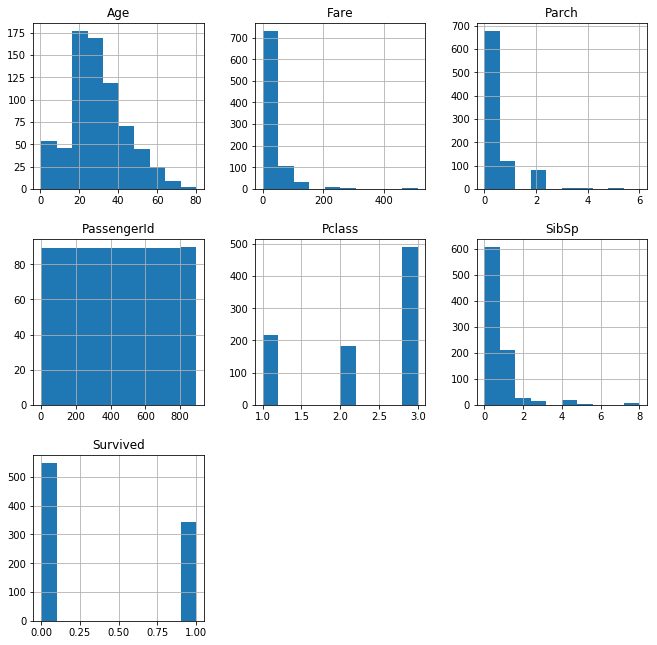

In [92]:
df.hist(figsize = (11,11))

In [93]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [95]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [97]:
x = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
x_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [98]:
x = x.dropna()
x_test = x_test.dropna()
y = x.loc[:,'Survived']
x = x.drop('Survived',axis = 1)

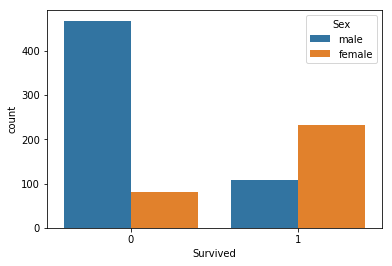

In [99]:
sns.countplot(x = 'Survived',hue = 'Sex',data = df)
# this shows that female count of survival is more than the male , and the no. of male death is more than the female .

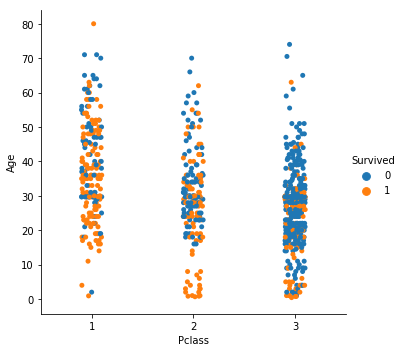

In [100]:
sns.catplot(x= 'Pclass',y = 'Age',hue = 'Survived',data = df)

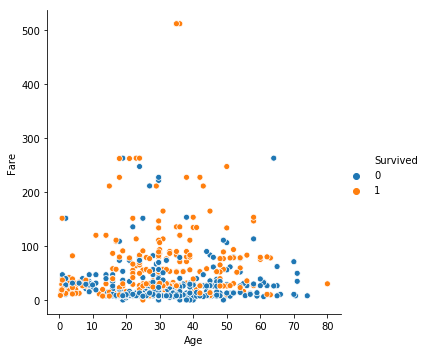

In [101]:
sns.relplot(x= 'Age',y = 'Fare',hue = 'Survived',data = df)

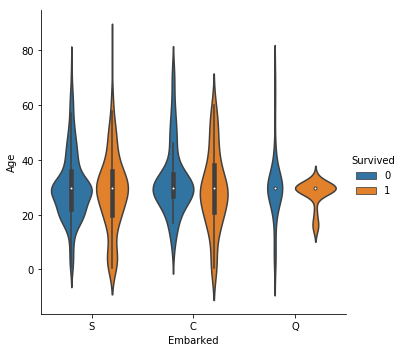

In [102]:
sns.catplot(x = 'Embarked', y = 'Age',hue = 'Survived',kind = 'violin',data = df)

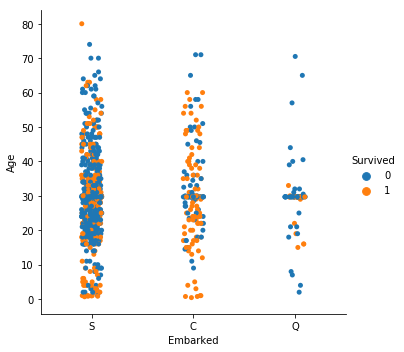

In [103]:
sns.catplot(x = 'Embarked' , y = 'Age',hue = 'Survived',data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002280ED29470>,
      dtype=object)

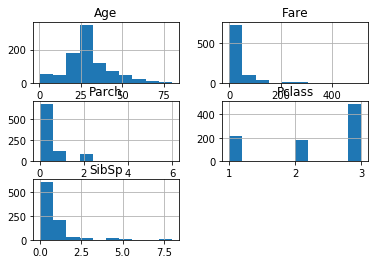

In [104]:
x.hist()

In [105]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x[['Age','Fare','Parch','SibSp']] = minmax.fit_transform(x[['Age','Fare','Parch','SibSp']])
x_test[['Age','Fare','Parch','SibSp']] = minmax.fit_transform(x_test[['Age','Fare','Parch','SibSp']])

In [106]:
x_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.452723,0.000,0.000000,0.015282,Q
1,3,female,0.617566,0.125,0.000000,0.013663,S
2,2,male,0.815377,0.000,0.000000,0.018909,Q
3,3,male,0.353818,0.000,0.000000,0.016908,S
4,3,female,0.287881,0.125,0.111111,0.023984,S
5,3,male,0.182382,0.000,0.000000,0.018006,S
6,3,female,0.393380,0.000,0.000000,0.014891,Q
7,2,male,0.340630,0.125,0.111111,0.056604,S
8,3,female,0.235131,0.000,0.000000,0.014110,C
9,3,male,0.274693,0.250,0.000000,0.047138,S


In [107]:
x = x.values
x_test = x_test.values
y = y.values

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] =  le.fit_transform(x[:,1])
x_test[:,1] =  le.fit_transform(x_test[:,1])
x[:,6] = le.fit_transform(x[:,6])
x_test[:,6] = le.fit_transform(x_test[:,6])

In [109]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
x = ohe.fit_transform(x).toarray()

In [110]:
x = x[:,1:]

In [111]:
x_test = ohe.fit_transform(x_test).toarray()

In [112]:
x_test = x_test[:,1:]

In [113]:
ohe1 = OneHotEncoder(categorical_features = [-1])
x = ohe1.fit_transform(x).toarray()

In [114]:
x = x[:,1:]

In [115]:
x_test = ohe1.fit_transform(x_test).toarray()

In [116]:
x_test = x_test[:,1:]

Now let's do Machine learning work

In [117]:
from sklearn.preprocessing import scale

In [118]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
x_scale = scale(x)
x_test_scale = x_test
log.fit(x_scale,y)
y_pred_scale = log.predict(x_scale)
y_test_scale = log.predict(x_test_scale)


In [119]:
from sklearn.metrics import confusion_matrix ,accuracy_score
confusion_matrix(y,y_pred_scale)

array([[477,  72],
       [102, 238]], dtype=int64)

In [120]:
accuracy_score(y,y_pred_scale)

0.8042744656917885

In [121]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x,y)
y_pred = svc.predict(x)
y_test = svc.predict(x_test)
accuracy_score(y,y_pred)

0.7896512935883014

In [122]:
accuracy_score(y,y_pred)

0.7896512935883014

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x,y)
y_pred = knn.predict(x)
y_test = knn.predict(x_test)
accuracy_score(y,y_pred)

0.8537682789651294

In [124]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x,y)
y_pred = dtc.predict(x)
y_test = dtc.predict(x_test)
accuracy_score(y,y_pred)

0.9820022497187851

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)
y_pred = rfc.predict(x) 
y_test = rfc.predict(x_test)
accuracy_score(y,y_pred)

0.9628796400449944